In [2]:
import numpy as np
import pickle
import os

In [100]:
theArrays = []

for filename in os.listdir("data/Spatial"):
    if filename.endswith(".pickle"):
        with open(os.path.join("data/Spatial", filename), "rb") as file:
            theArrays.append(pickle.load(file)[1:,:])
        print(filename)

theArrays

biogas_kw_2019.pickle
brown_coal_kw_2019.pickle
completed_solar_kw_2019.pickle
completed_wind_onshore_kw_2019.pickle
demand_kw_2019.pickle
hard_coal_kw_2019.pickle
nuclear_kw_2019.pickle
oil_kw_2019.pickle
water_laufwasser_kw_2019.pickle
water_pumpspeicher_PB_kw_2019.pickle
water_pumpspeicher_TB_kw_2019.pickle
water_speicherwasser_kw_2019.pickle
wind_offshore_kw_2019.pickle


[array([[ 27970.8055962 ,  28033.26577922,  27970.8055962 , ...,
              0.        ,      0.        ,      0.        ],
        [ 26855.45465134,  26915.42420091,  26855.45465134, ...,
              0.        ,      0.        ,      0.        ],
        [ 29455.55648207,  29521.33218676,  29455.55648207, ...,
              0.        ,      0.        ,      0.        ],
        ...,
        [101644.18329504, 101871.15974982, 101644.18329504, ...,
              0.        ,      0.        ,      0.        ],
        [ 20610.51326569,  20656.53755435,  20610.51326569, ...,
              0.        ,      0.        ,      0.        ],
        [ 77874.66917086,  78048.56713288,  77874.66917086, ...,
              0.        ,      0.        ,      0.        ]]),
 array([[      0.        ,       0.        ,       0.        , ...,
               0.        ,       0.        ,       0.        ],
        [ 869479.63988178,  796436.30981074,  780092.70755732, ...,
               0.        ,   

In [71]:
combined_array = np.concatenate(theArrays, axis=0)
combined_array.shape

(1287, 35040)

In [199]:
num_regions = 99

rows_per_region = combined_array.shape[0] // num_regions

region_arrays = [combined_array[i:i+rows_per_region, :] for i in range(0, combined_array.shape[0], rows_per_region)]
region_data = dict(zip(regions, region_arrays))

start_date = pd.to_datetime('2019-01-01 00:00:00')
end_date = pd.to_datetime('2019-12-31 23:45:00')

idx = pd.date_range(start_date, end_date, freq='15min')

region27 = pd.DataFrame(region_data["Region27"], columns=idx, index=["Biogas (kW)", "Brown Coal (kW)", "Solar (kW)", "Wind Onshore (kW)", "Demand (kW)",
                                                 "Hard Coal (kW)", "Nuclear (kW)", "Oil (kW)", "Water Laufwasser (kW)", "Water Pumpspeicher PB (kW)",
                                                 "Water Pumpspeicher TB (kW)", "Water Speicherwasser (kW)", "Wind Offshore (kW)"]).transpose()

region27

,Biogas (kW),Brown Coal (kW),Solar (kW),Wind Onshore (kW),Demand (kW),Hard Coal (kW),Nuclear (kW),Oil (kW),Water Laufwasser (kW),Water Pumpspeicher PB (kW),Water Pumpspeicher TB (kW),Water Speicherwasser (kW),Wind Offshore (kW)
2019-01-01 00:00:00,42823.549467,55060.203305,14610.682344,17612.531556,273520.422353,0.100842,4100.588852,0.0,11706.838366,4124.114637,6936.427286,-792.725345,20451.077079
2019-01-01 00:15:00,53378.361099,83593.563757,18029.438065,19580.398377,352731.419370,0.117708,4324.178105,0.0,15272.024867,5000.113748,7771.276128,-891.816013,25287.956388
2019-01-01 00:30:00,55527.729465,74139.124895,21340.233078,21127.502714,410511.569381,0.133361,4670.515206,0.0,19214.298401,5752.791351,7894.476790,-891.816013,33012.875284
2019-01-01 00:45:00,61001.202050,71656.484474,32964.002529,21938.899449,369913.046712,0.144056,5110.013329,0.0,20259.857904,6355.319004,8535.995708,-693.634677,44705.913614
2019-01-01 01:00:00,62664.936593,64854.729896,30696.827683,20702.892597,333933.241070,0.159050,5603.713385,0.0,23196.566015,6984.950873,8966.830818,4260.898730,51115.952698
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:45:00,109036.316445,88558.844599,3022.899795,3122.216414,32284.832020,0.041023,932.131796,0.0,-62.847839,4182.676534,5104.036553,190254.082832,58864.351591
2019-12-31 23:00:00,102533.802779,72098.598521,3130.860502,3413.985281,53022.871473,0.037212,827.727565,0.0,-68.561279,3925.276449,4521.178443,185002.277420,58112.991699
2019-12-31 23:15:00,89121.191469,52747.606748,3238.821209,3641.203076,58750.080587,0.030061,668.101554,0.0,-62.847839,3179.802527,3631.917128,165283.234460,45457.273507
2019-12-31 23:30:00,75738.073593,43701.273160,3130.860502,4518.383256,100688.031194,0.025752,576.553521,0.0,79.988159,2716.005339,3069.370002,152005.084929,36511.394784


In [200]:
region27.describe()

,Biogas (kW),Brown Coal (kW),Solar (kW),Wind Onshore (kW),Demand (kW),Hard Coal (kW),Nuclear (kW),Oil (kW),Water Laufwasser (kW),Water Pumpspeicher PB (kW),Water Pumpspeicher TB (kW),Water Speicherwasser (kW),Wind Offshore (kW)
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.0,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,181507.683672,142909.824791,16123.252175,9677.212196,160004.915679,0.230357,7958.594460,0.0,25250.616279,13088.103511,16104.262199,133868.887569,141793.728290
std,189292.586877,156261.784905,21557.072432,9972.252995,158689.710363,0.255475,8643.225172,0.0,33407.990276,14154.156402,16612.402951,145387.754625,159149.333318
min,-2110.578184,-4285.105384,0.000000,-4.688273,0.000000,-0.002193,-131.813236,0.0,-554.203671,-82.795140,-243.321640,-6044.530757,-1408.799799
25%,39535.542653,22845.393187,2375.135553,2366.101442,29005.542931,0.041120,1438.094168,0.0,931.290705,2620.718949,3511.469840,20140.178300,20004.957142
50%,109789.017342,86008.186632,7989.092316,6123.204298,106207.398041,0.134473,4774.853841,0.0,11204.055654,7658.207944,9996.252404,83236.161239,76896.989015
75%,268720.156430,209664.084851,21052.337860,13866.602877,251904.826666,0.333733,11714.635504,0.0,35918.968324,18875.708399,23840.798067,203221.292680,214084.739418
max,867719.712474,685378.800000,170282.600000,52565.735805,642602.100000,1.209722,41663.222378,0.0,154400.000000,66079.003022,78961.227653,709767.400000,630038.750000


In [201]:
region27[0::4]
region27

,Biogas (kW),Brown Coal (kW),Solar (kW),Wind Onshore (kW),Demand (kW),Hard Coal (kW),Nuclear (kW),Oil (kW),Water Laufwasser (kW),Water Pumpspeicher PB (kW),Water Pumpspeicher TB (kW),Water Speicherwasser (kW),Wind Offshore (kW)
2019-01-01 00:00:00,42823.549467,55060.203305,14610.682344,17612.531556,273520.422353,0.100842,4100.588852,0.0,11706.838366,4124.114637,6936.427286,-792.725345,20451.077079
2019-01-01 00:15:00,53378.361099,83593.563757,18029.438065,19580.398377,352731.419370,0.117708,4324.178105,0.0,15272.024867,5000.113748,7771.276128,-891.816013,25287.956388
2019-01-01 00:30:00,55527.729465,74139.124895,21340.233078,21127.502714,410511.569381,0.133361,4670.515206,0.0,19214.298401,5752.791351,7894.476790,-891.816013,33012.875284
2019-01-01 00:45:00,61001.202050,71656.484474,32964.002529,21938.899449,369913.046712,0.144056,5110.013329,0.0,20259.857904,6355.319004,8535.995708,-693.634677,44705.913614
2019-01-01 01:00:00,62664.936593,64854.729896,30696.827683,20702.892597,333933.241070,0.159050,5603.713385,0.0,23196.566015,6984.950873,8966.830818,4260.898730,51115.952698
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:45:00,109036.316445,88558.844599,3022.899795,3122.216414,32284.832020,0.041023,932.131796,0.0,-62.847839,4182.676534,5104.036553,190254.082832,58864.351591
2019-12-31 23:00:00,102533.802779,72098.598521,3130.860502,3413.985281,53022.871473,0.037212,827.727565,0.0,-68.561279,3925.276449,4521.178443,185002.277420,58112.991699
2019-12-31 23:15:00,89121.191469,52747.606748,3238.821209,3641.203076,58750.080587,0.030061,668.101554,0.0,-62.847839,3179.802527,3631.917128,165283.234460,45457.273507
2019-12-31 23:30:00,75738.073593,43701.273160,3130.860502,4518.383256,100688.031194,0.025752,576.553521,0.0,79.988159,2716.005339,3069.370002,152005.084929,36511.394784


<AxesSubplot:>

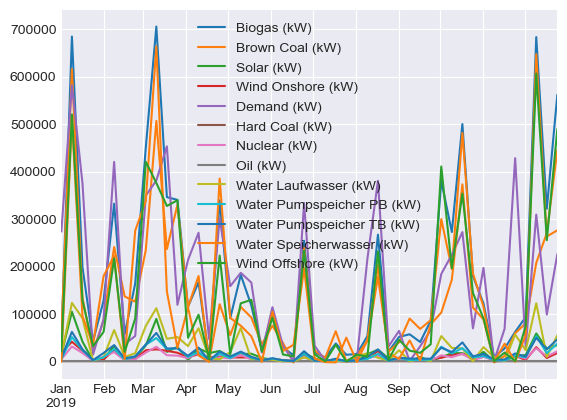

In [202]:
region27[0::730].plot()